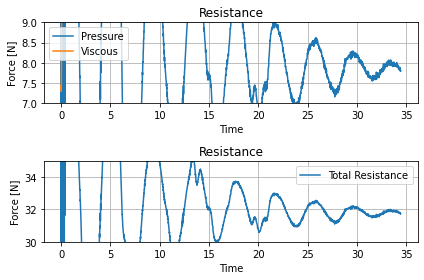

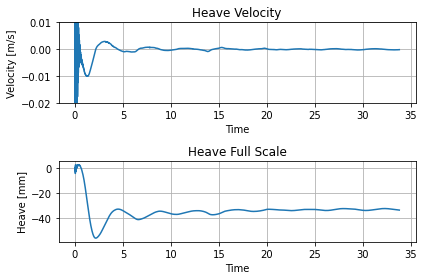

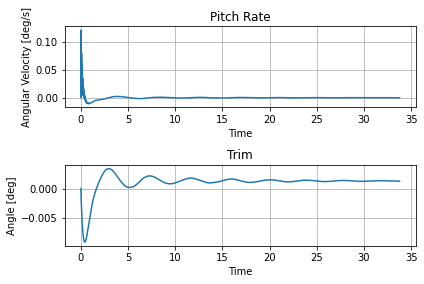

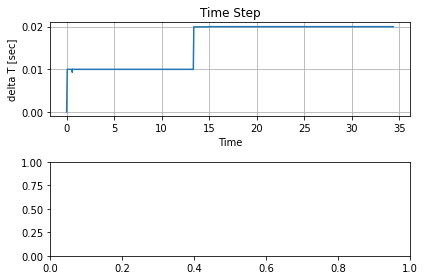

TIME: 34.42 sec
Final dt: 0.020000000000003126 sec
PX: 7.7998978 N
VX: 23.935476 N
TX: 31.7353738 N
TRIM: 0.0012705009 deg
TRIM AUC: -0.001270501328256955 deg
Sinkage: -33.5545874258482 mm in Full Scale
Heave Integral: -33.55458742584834 mm in Full Scale


In [19]:
from fluidfoam.readpostpro import readforce
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.metrics import auc

sol = './'
force = readforce(sol, time_name = 'mergeTime', namepatch="forces", name="force")
rbs = readforce(sol, time_name = 'mergeTime', namepatch="sixDoFRigidBodyState", name="sixDoFRigidBodyState")

## Plot the forces ##
fig, axs = plt.subplots(2, 1)

time = force[:,0]
dt = time[1:-1] - time[0:-2]
px = -2*force[:,4]
vx = -2*force[:,7]
tx = -2*force[:,1] # tx = (px + vx)

axs[0].plot(time, px, time, vx)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Force [N]')
axs[0].legend(['Pressure', 'Viscous'])
axs[0].set_title('Resistance')
axs[0].set_ylim(7,9)
axs[0].grid()

axs[1].plot(time, tx)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Force [N]')
axs[1].legend(['Total Resistance'])
axs[1].set_title('Resistance')
axs[1].set_ylim(30,35)
axs[1].grid()

fig.tight_layout()

## Plot the rigid body state ##
fig, axs = plt.subplots(2, 1)

timeRBS = rbs[:,0]
trim = rbs[:,3]
w = rbs[:,12]
heave = integrate.cumtrapz(w, timeRBS, initial=0)*5.6*1000
q = rbs[:,14]

axs[0].plot(timeRBS, w)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Velocity [m/s]')
axs[0].set_title('Heave Velocity')
axs[0].set_ylim(-0.02,0.01)
axs[0].grid()

axs[1].plot(timeRBS, heave)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Heave [mm]')
axs[1].set_title('Heave Full Scale')
# axs[1].set_ylim(-0.02,0.01)
axs[1].grid()

fig.tight_layout()

fig, axs = plt.subplots(2, 1)

axs[0].plot(timeRBS, -q)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Angular Velocity [deg/s]')
axs[0].set_title('Pitch Rate')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

axs[1].plot(timeRBS, -trim)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Angle [deg]')
axs[1].set_title('Trim')
axs[1].grid()

fig.tight_layout()

fig, axs = plt.subplots(2, 1)

axs[0].plot(time[0:-2], dt)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('delta T [sec]')
axs[0].set_title('Time Step')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

# axs[1].plot(time, -trim)
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Angle [deg]')
# axs[1].set_title('Trim')
# axs[1].grid()

fig.tight_layout()
plt.show()

print('TIME:', time[-1], 'sec')
print('Final dt:' , time[-1]-time[-2], 'sec')
print('PX:', px[-1], 'N')
print('VX:', vx[-1], 'N')
print('TX:', tx[-1], 'N')
print('TRIM:', -trim[-1], 'deg')
print('TRIM AUC:', -auc(timeRBS, q), 'deg')
print('Sinkage:', auc(timeRBS, w)*5.6*1000, 'mm in Full Scale')
print('Heave Integral:', heave[-1], 'mm in Full Scale')